In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
filess = [file for file in os.listdir('C:/Users/kamak/Downloads/Sales_Data-20230323T205635Z-001/Sales_Data')]

In [8]:
for file in filess:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [9]:
path = 'C:/Users/kamak/Downloads/Sales_Data-20230325T073232Z-001/Sales_Data'
all_data = pd.DataFrame()
for file in filess:
    current_df = pd.read_csv(path+ "/" +file)
    all_data = pd.concat([all_data,current_df])

In [10]:
all_data.shape

(186850, 6)

In [11]:
all_data.to_csv('C:/Users/kamak/Downloads/Sales_Data-20230325T073232Z-001/Sales_Data/all_data.csv',index = False)

In [12]:

############# ANALYZING MONTHLY SALES ################



In [13]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [15]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [16]:
all_data.dropna(inplace=True)

In [17]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [18]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [19]:
all_data.shape

(186305, 6)

In [20]:
#to analyze monthly sales we need to extract month from order date


In [21]:
'04/19/19 08:46'.split('/')

['04', '19', '19 08:46']

In [22]:
def month(x):
    return x.split('/')[0]

In [23]:
all_data['month']= all_data['Order Date'].apply(month)

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [25]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [26]:
all_data['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [27]:
filter = all_data['month']=='Order Date'
all_data = all_data[~filter]

In [28]:
all_data['month']=all_data['month'].astype(int)

In [29]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

In [31]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data['Price Each']=all_data['Quantity Ordered'].astype(float)

In [33]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

In [34]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [35]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,2.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4.0
2,176559,Bose SoundSport Headphones,1,1.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1.0
3,176560,Google Phone,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0
4,176560,Wired Headphones,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0
5,176561,Wired Headphones,1,1.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1.0


In [36]:
all_data.groupby('month')['sales'].sum()

month
1     14151.0
2     17331.0
3     22033.0
4     26604.0
5     24361.0
6     19667.0
7     21108.0
8     17538.0
9     16985.0
10    29287.0
11    25888.0
12    36590.0
Name: sales, dtype: float64

In [38]:
months = range(1,13)

Text(0, 0.5, 'sales in USD')

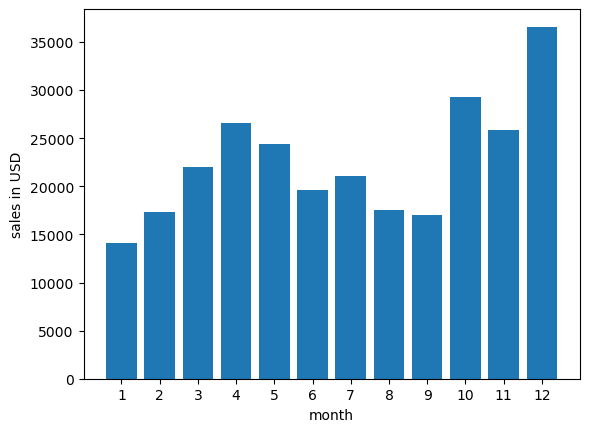

In [39]:
plt.bar(months,all_data.groupby('month')['sales'].sum())
plt.xticks(months)
plt.xlabel('month')
plt.ylabel('sales in USD')

In [105]:
####### ANALUZING WHICH CITY HAS MAXIMUS ORDER ######


In [104]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,2.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4.0
2,176559,Bose SoundSport Headphones,1,1.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1.0
3,176560,Google Phone,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0
4,176560,Wired Headphones,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0
5,176561,Wired Headphones,1,1.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1.0


In [40]:
def city(x):
    return x.split(',')[1]

In [41]:
all_data['city']=all_data['Purchase Address'].apply (city)

In [42]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,2.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4.0,Dallas
2,176559,Bose SoundSport Headphones,1,1.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1.0,Boston
3,176560,Google Phone,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,Los Angeles
4,176560,Wired Headphones,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,Los Angeles
5,176561,Wired Headphones,1,1.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1.0,Los Angeles


<AxesSubplot:xlabel='city'>

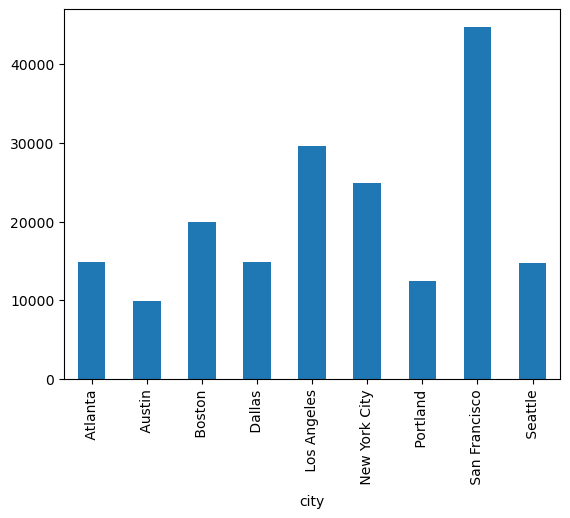

In [107]:
all_data.groupby('city')['city'].count().plot.bar()

In [51]:
#           ANALYSISNG MOST SOLD PRODUCTS


In [108]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,2.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4.0,Dallas
2,176559,Bose SoundSport Headphones,1,1.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1.0,Boston
3,176560,Google Phone,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,Los Angeles
4,176560,Wired Headphones,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,Los Angeles
5,176561,Wired Headphones,1,1.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1.0,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,3.0,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,9.0,Los Angeles
11682,259354,iPhone,1,1.0,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,1.0,San Francisco
11683,259355,iPhone,1,1.0,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,1.0,San Francisco
11684,259356,34in Ultrawide Monitor,1,1.0,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,1.0,San Francisco


In [43]:
all_data.shape

(185950, 9)

In [44]:
all_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

Text(0, 0.5, 'Quantity ordered')

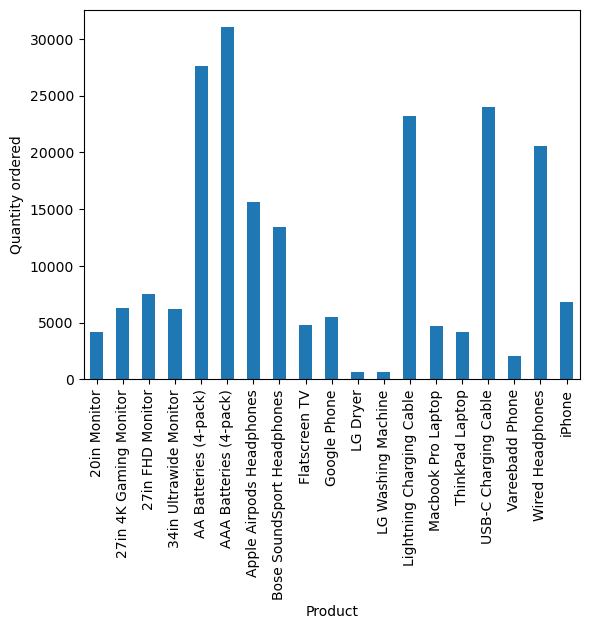

In [45]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')
plt.ylabel('Quantity ordered')

In [46]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                  1.006828
27in 4K Gaming Monitor        1.002247
27in FHD Monitor              1.005728
34in Ultrawide Monitor        1.002912
AA Batteries (4-pack)         1.343004
AAA Batteries (4-pack)        1.502689
Apple Airpods Headphones      1.007203
Bose SoundSport Headphones    1.009906
Flatscreen TV                 1.003958
Google Phone                  1.001267
LG Dryer                      1.000000
LG Washing Machine            1.000000
Lightning Charging Cable      1.071983
Macbook Pro Laptop            1.000847
ThinkPad Laptop               1.000484
USB-C Charging Cable          1.094599
Vareebadd Phone               1.001453
Wired Headphones              1.088709
iPhone                        1.001023
Name: Price Each, dtype: float64

In [47]:
products = all_data.groupby('Product')['Quantity Ordered'].sum().index
price = all_data.groupby('Product')['Price Each'].mean()
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()


C:\Users\kamak\AppData\Local\Temp\ipykernel_30900\2903074704.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = 90)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

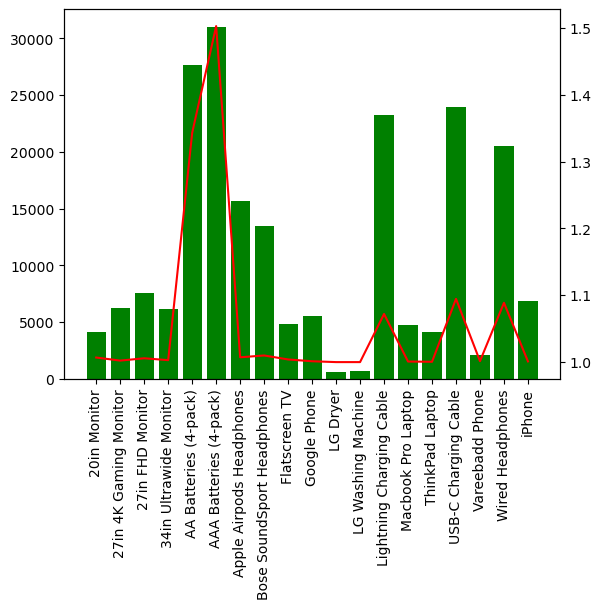

In [48]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity,color = 'g')
ax2.plot(products,price,color = 'r')
ax1.set_xticklabels(products,rotation = 90)


In [49]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,2.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4.0,Dallas
2,176559,Bose SoundSport Headphones,1,1.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1.0,Boston
3,176560,Google Phone,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,Los Angeles
4,176560,Wired Headphones,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,Los Angeles
5,176561,Wired Headphones,1,1.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1.0,Los Angeles


In [50]:
#      ANALYZING PRODUCTS WHICH ARE MOST OFTEN SOLD TOGETHER



In [52]:
df = all_data['Order ID'].duplicated(keep=False)

In [53]:
df2 = all_data[df]

In [55]:
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
3,176560,Google Phone,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,Los Angeles
4,176560,Wired Headphones,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,Los Angeles
18,176574,Google Phone,1,1.0,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,1.0,Los Angeles
19,176574,USB-C Charging Cable,1,1.0,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,1.0,Los Angeles
30,176585,Bose SoundSport Headphones,1,1.0,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,1.0,Boston
...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,1.0,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,1.0,Atlanta
11639,259314,Wired Headphones,1,1.0,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,1.0,Atlanta
11640,259314,AAA Batteries (4-pack),2,2.0,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,4.0,Atlanta
11677,259350,Google Phone,1,1.0,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,1.0,San Francisco


In [56]:
df2['Grouped']=df2.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

C:\Users\kamak\AppData\Local\Temp\ipykernel_30900\560018863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped']=df2.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


In [57]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Grouped
3,176560,Google Phone,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,Los Angeles,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,Los Angeles,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,1.0,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,1.0,Los Angeles,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,1.0,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,1.0,Los Angeles,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,1.0,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,1.0,Boston,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [59]:
df2 = df2.drop_duplicates(subset=['Order ID'])

In [60]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Grouped
3,176560,Google Phone,1,1.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1.0,Los Angeles,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,1.0,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,1.0,Los Angeles,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,1.0,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,1.0,Boston,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.0,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,4.0,San Francisco,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,1.0,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,1.0,New York City,"Lightning Charging Cable,USB-C Charging Cable"


In [61]:
df2['Grouped'].value_counts()

iPhone,Lightning Charging Cable                                            882
Google Phone,USB-C Charging Cable                                          856
iPhone,Wired Headphones                                                    361
Vareebadd Phone,USB-C Charging Cable                                       312
Google Phone,Wired Headphones                                              303
                                                                          ... 
Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable      1
34in Ultrawide Monitor,LG Washing Machine                                    1
20in Monitor,iPhone                                                          1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor          1
LG Washing Machine,AA Batteries (4-pack)                                     1
Name: Grouped, Length: 366, dtype: int64

<AxesSubplot:ylabel='Grouped'>

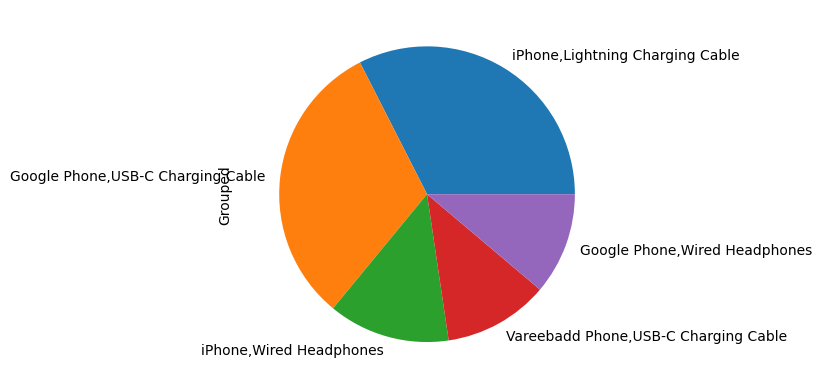

In [66]:
df2['Grouped'].value_counts()[0:5].plot.pie()